__Alejandro Gonzalez Garcia__
<br>
Date: Mar. 25, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 29: Discrete Fourier Transform</font></center>



## <font color=#46769B>Introduction</font>


The goals of this exercise are:
- Introduction to Discrete Fourier Transform (DFT)
- Further practice with Fourier series

Required reading:
- *Lesson 13: Discrete Fourier Transform*




## <font color=#46769B>Exercise:  Part (a) </font>

Consider the square wave

$$f(t) = \left\{ \begin{array}{cc} 1 & {\rm for} \; 0 \le  t < \tfrac{T}{2} \\ 0 & {\rm for} \; \tfrac{T}{2} \le t < T \end{array} \right. , \qquad (1)$$

for $T=1$. Now, perform the following steps:
- Calculate the Fourier coefficients $c_k$ by taking the DFT of $f(t)$ for $N=10$ evenly-spaced samples over *one* period $0 \le t < T$. Plot the magnitudes of each $c_k$ for non-negative values of $k$ (using `matplotlib.pyplot.stem()` or another method you prefer). In your plot, label the $x$-axis by the angular frequency value $\omega = 2\pi k/T$, not simply by the integer $k$.
- Repeat the above steps for $N=100$.
- Consider now $N=1000$ evenly-spaced samples over *ten* periods $0 \le t < 10T$. Repeat the above steps, except note that now $k$ is related to angular frequency by $\omega = 2\pi k/(10T)$.

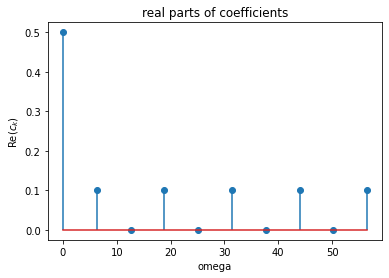

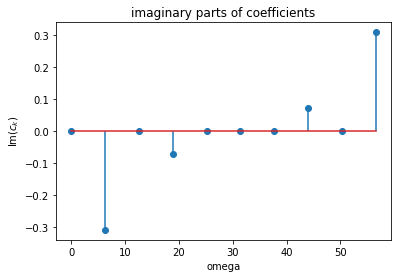

N = 100 shown below


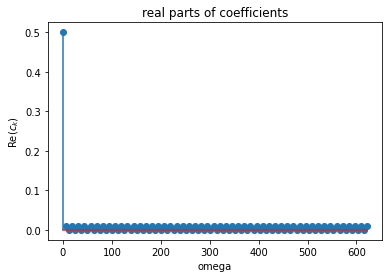

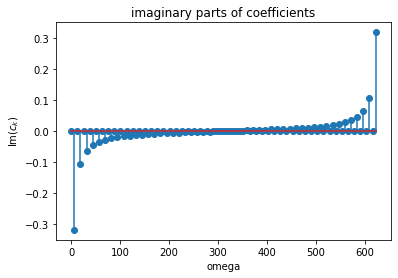

N = 1000 and new t values are shown below


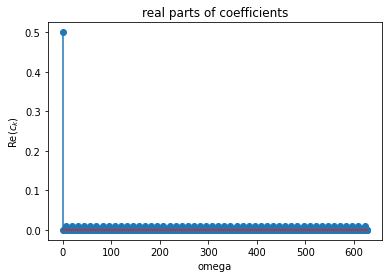

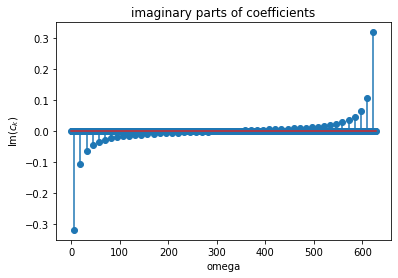

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
T = 1 
h = T/N

tn = np.arange(0,T,h)

def square_wave(t):
    if (t >= 0) & (t < T/2):
        return 1
    elif (t >=T/2) & (t < T):
        return 0
    elif t < 0:
        # Shift t up by one period
        return square_wave(t+T)
    else:
        # Shift t down by one period
        return square_wave(t-T)

F = np.vectorize(square_wave)

fn = F(tn)


ck = np.zeros(N,dtype='complex')
omega = np.zeros(N)
for k in range(N):
  n = np.array(range(N))

  ck[k] = 1/N * np.sum(fn * np.exp(-2j*np.pi*k*n/N))
  omega[k] = 2*np.pi*k/T
plt.stem(omega,ck.real,use_line_collection=True)
plt.xlabel('omega')
plt.ylabel(r'Re($c_k$)')
plt.title('real parts of coefficients')
plt.show()

plt.stem(omega,ck.imag,use_line_collection=True)
plt.xlabel('omega')
plt.ylabel(r'Im($c_k$)')
plt.title('imaginary parts of coefficients')
plt.show()

#repeat with N = 100 
print('N = 100 shown below')
N = 100 
T = 1 
h = T/N

tn = np.arange(0,T,h)

def square_wave(t):
    if (t >= 0) & (t < T/2):
        return 1
    elif (t >=T/2) & (t < T):
        return 0
    elif t < 0:
        # Shift t up by one period
        return square_wave(t+T)
    else:
        # Shift t down by one period
        return square_wave(t-T)

F = np.vectorize(square_wave)

fn = F(tn)


ck = np.zeros(N,dtype='complex')
omega = np.zeros(N)
for k in range(N):
  n = np.array(range(N))

  ck[k] = 1/N * np.sum(fn * np.exp(-2j*np.pi*k*n/N))
  omega[k] = 2*np.pi*k/T
plt.stem(omega,ck.real,use_line_collection=True)
plt.xlabel('omega')
plt.ylabel(r'Re($c_k$)')
plt.title('real parts of coefficients')
plt.show()

plt.stem(omega,ck.imag,use_line_collection=True)
plt.xlabel('omega')
plt.ylabel(r'Im($c_k$)')
plt.title('imaginary parts of coefficients')
plt.show()

#repeat with new t values and N = 1000
print('N = 1000 and new t values are shown below')
N = 1000
h = 10*T/N
tn = np.arange(0,10*T,h)


def square_wave(t):
    if (t >= 0) & (t < T/2):
        return 1
    elif (t >=T/2) & (t < T):
        return 0
    elif t < 0:
        # Shift t up by one period
        return square_wave(t+T)
    else:
        # Shift t down by one period
        return square_wave(t-T)

F = np.vectorize(square_wave)

fn = F(tn)


ck = np.zeros(N,dtype='complex')
omega = np.zeros(N)
for k in range(N):
  n = np.array(range(N))

  ck[k] = 1/N * np.sum(fn * np.exp(-2j*np.pi*k*n/N))
  omega[k] = 2*np.pi*k/(10*T)
plt.stem(omega,ck.real,use_line_collection=True)
plt.xlabel('omega')
plt.ylabel(r'Re($c_k$)')
plt.title('real parts of coefficients')
plt.show()

plt.stem(omega,ck.imag,use_line_collection=True)
plt.xlabel('omega')
plt.ylabel(r'Im($c_k$)')
plt.title('imaginary parts of coefficients')
plt.show()

## <font color=#46769B>Exercise: Part (b) </font>

Next, we will add random noise to our samples and see how this changes the Fourier coefficients. In Part (a), we calculated samples $f_n = f(t_n)$. Here, add a random value to each sample as follows

$$f_n = f(t_n) + \delta_n$$

where $\delta_n$ is sampled from a normal distribution with mean $\mu=0$ and standard deviation $\sigma = 1.5$. You are meant to add a *unique* random number to *each* sample, so you will need to generate $N$ random numbers in total. 

Perform the following tasks:
- Generate $N=10^4$ evenly-spaced samples $f_n$ over *100 periods*, in the range $0 \le t < 100 T$, adding some random noise to each sample as described above. Plot your samples $f_n$ as a function of $t_n$, over the range $[0,10]$. The idea is that we are adding a lot of noise and the original function is obscured.
- Calculate the Fourier coefficients $c_k$ using DFT. Make a plot of their magnitudes vs angular frequency, as in Part (a).

Next, we will consider how we can reconstruct the original signal, $f(t)$. Based on your preceding plot, choose by eye a minimum cut-off $c_{\rm min}$ such that any Fourier coefficient with $|c_k| < c_{\rm min}$ is set to zero. The idea is to zero out the Fourier coefficients that are dominated by noise and keep only the obvious ones that are visible in your plot.

Perform the following tasks:
- Modify your list of Fourier coefficients $c_k$, setting to zero any values with $|c_k| < c_{\rm min}$.
- Using your modified $c_k$ values, generate new samples $f_n$. (That is, you are inverting the DFT to obtain the samples for $f(t)$ from the Fourier coefficients. This is not hard to do: just write down the Fourier series with your new Fourier coefficients and evaluate it for all the sample times $t_n$.)
- Plot your new samples $f_n$ as a function of $t_n$, over the range $[0,10]$. Compare on the same plot to the exact function $f(t)$ in Eq. (1).

This is a very simplistic way to filter out noise: convert to the __frequency domain__ using DFT and selecting out any obvious signals.

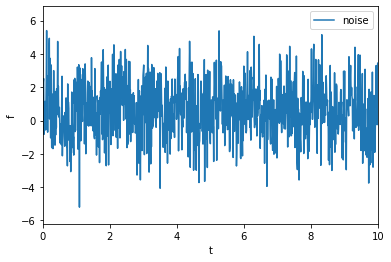

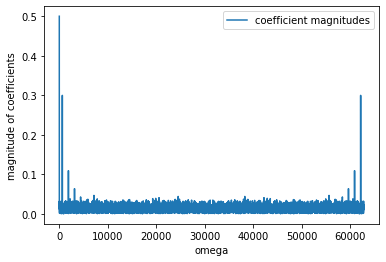

In [2]:
N = 10**4
T = 1 
h = 100*T/N

tn = np.arange(0,100*T,h)

def square_wave(t):
    if (t >= 0) & (t < T/2):
        return 1
    elif (t >=T/2) & (t < T):
        return 0
    elif t < 0:
        # Shift t up by one period
        return square_wave(t+T)
    else:
        # Shift t down by one period
        return square_wave(t-T)

F = np.vectorize(square_wave)

#generate random samples from normal distribution
sample = np.random.normal(0,1.5,N)

fn = F(tn) + sample 

plt.plot(tn,fn,label='noise')
plt.xlim(0,10)
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.show()

#calculate coefficients
ck = np.zeros(N,dtype='complex')
omega = np.zeros(N)
for k in range(N):
  n = np.array(range(N))

  ck[k] = 1/N * np.sum(fn * np.exp(-2j*np.pi*k*n/N))
  omega[k] = 2*np.pi*k/T

c = abs(ck)

plt.plot(omega,c,label='coefficient magnitudes')
plt.xlabel('omega')
plt.ylabel('magnitude of coefficients')
plt.legend()
plt.show()

# pick cmin
cmin = 0.2

#obtain new coefficients

for i in range(len(c)):
  if c[i] < cmin:
    c[i] = 0

#got confused here...
  